In [1]:
import sounddevice as sd
import numpy as np

sd.query_devices()

   0 Microsoft-geluidstoewijzing - Input, MME (2 in, 0 out)
>  1 Microfoon (Realtek High Definit, MME (2 in, 0 out)
   2 Microfoon (Steam Streaming Micr, MME (8 in, 0 out)
   3 Microsoft-geluidstoewijzing - Output, MME (0 in, 2 out)
<  4 Luidsprekers (Realtek High Defi, MME (0 in, 2 out)
   5 Luidsprekers (Steam Streaming S, MME (0 in, 8 out)
   6 Luidsprekers (Steam Streaming M, MME (0 in, 8 out)
   7 Stereo-mix (Realtek HD Audio Stereo input), Windows WDM-KS (2 in, 0 out)
   8 Microfoon (Realtek HD Audio Mic input), Windows WDM-KS (2 in, 0 out)
   9 Speakers (Realtek HD Audio output), Windows WDM-KS (0 in, 2 out)
  10 Output (@System32\drivers\bthhfenum.sys,#4;%1 Hands-Free HF Audio%0
;(Fairphone 4)), Windows WDM-KS (0 in, 1 out)
  11 Input (@System32\drivers\bthhfenum.sys,#4;%1 Hands-Free HF Audio%0
;(Fairphone 4)), Windows WDM-KS (1 in, 0 out)
  12 Input (), Windows WDM-KS (2 in, 0 out)
  13 Microfoon (Steam Streaming Microphone Wave), Windows WDM-KS (8 in, 0 out)
  14 Speakers (St

In [61]:
duration = 2
fs = 44000
recording = sd.rec(int(duration * fs), device = 1,channels=2)

sd.wait()

In [62]:
print(np.shape(recording))

(88000, 2)


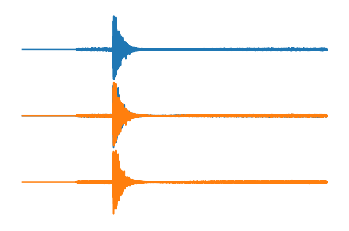

In [63]:
import matplotlib.pyplot as plt

plt.plot(recording)
plt.plot(recording[:,1]+2, color='C0')
plt.plot(recording[:,0]-2, color='C1')

plt.axis('off')

plt.show()

In [98]:
rec = recording[:,0]

In [99]:
sample_max = max(rec)
percentage_nagalm = 0.6

In [100]:
lager_dan_max = []
for i in range(len(rec)):
    if rec[i] < percentage_nagalm*sample_max:
        lager_dan_max.append(1)
    else:
        lager_dan_max.append(-1)

In [101]:
print(len(rec))
plotter = range(0,len(rec))

88000


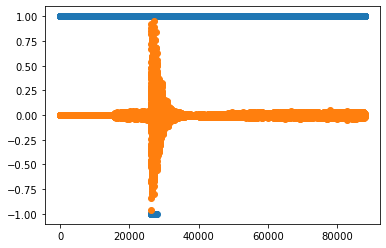

In [102]:
plt.scatter(plotter,lager_dan_max)
plt.scatter(plotter, rec)

In [103]:
rec_abs = abs(rec)

In [104]:
sample_max = max(rec)
percentage_nagalm = 0.6

In [105]:
lager_dan_max_abs = []
for i in range(len(rec_abs)):
    if rec_abs[i] < percentage_nagalm*sample_max:
        lager_dan_max_abs.append(0)
    else:
        lager_dan_max_abs.append(1)

In [106]:
print(len(rec))
plotter = range(0,len(rec))

88000


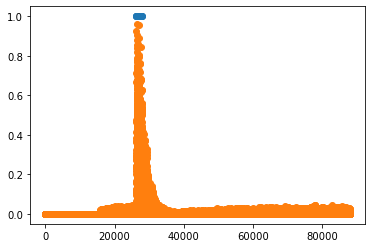

In [107]:
plt.scatter(plotter,lager_dan_max_abs)
plt.scatter(plotter, rec_abs)

In [108]:
for i in range(0,len(lager_dan_max_abs)-1):
    if lager_dan_max_abs[i] == 1:
        eerste_punt = i
        print(i)
        break
for i in range(len(lager_dan_max_abs)-1,0,-1):
    if lager_dan_max_abs[i] == 1:
        laaste_punt = i
        print(i)
        break

26304
27957


In [109]:
door_getrokken = np.zeros_like(lager_dan_max_abs)
door_getrokken[eerste_punt:laaste_punt] = 1

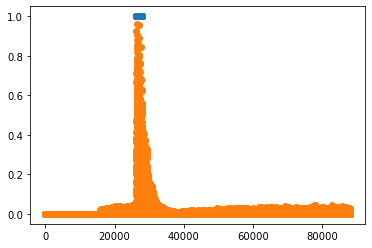

In [110]:
plt.scatter(plotter,door_getrokken)
plt.scatter(plotter, rec_abs)

In [111]:
nagalm_tijd = sum(door_getrokken)/fs

In [113]:
print(f'{nagalm_tijd} sec om van max naar 60% te komen')

0.03756818181818182 sec om van max naar 60% te komen


# DEcibel omrekenen

In [69]:
i_0 = 10**-12

In [79]:
rec_db = np.log10(rec/i_0)

<ipython-input-79-ba09aa7cd9dc>:1: RuntimeWarning: divide by zero encountered in log10
  rec_db = np.log10(rec/i_0)
<ipython-input-79-ba09aa7cd9dc>:1: RuntimeWarning: invalid value encountered in log10
  rec_db = np.log10(rec/i_0)


In [80]:
print(rec_db[20000:25000])

[ 9.8537655  9.419048  10.133885  ...        nan        nan        nan]


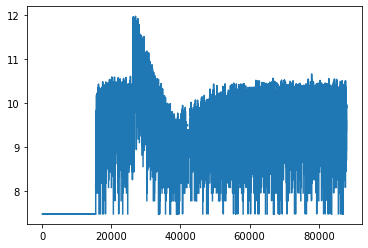

In [81]:
plt.plot(rec_db)